## Homework 3: Python & Web Scraper

Shannon Paylor (sep4hy)

#### Introduction

For this assignment, I chose to scrape stock references from [Motley Fool](https://www.fool.com) articles. The Motley Fool covers investing and stocks, and I thought it would be interesting to aggregate data on which stocks are mentioned most frequently in their articles.

#### Approach & Code Overview

I chose to use the BeautifulSoup library to handle the webscraping, and I utilized the [documentation](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) as well a [tutorial](https://programminghistorian.org/en/lessons/intro-to-beautiful-soup) from The Programming Historian to figure out how to accomplish what I wanted. I also used the requests library to fetch the html of the webpages and the pandas library for working with dataframes. To create my charts, I used the [seaborn](https://seaborn.pydata.org/index.html) library and [two](https://stackoverflow.com/questions/40925458/date-axis-in-heatmap-seaborn) [tutorials](https://python-graph-gallery.com/92-control-color-in-seaborn-heatmaps/) I found online.

In order to get the data I wanted, there were really two scraping tasks needed: gathering a list of links to articles from the homepage and assembling a dataframe of stocks referenced in those articles. I wanted to practice using classes and associated methods, so I chose to create two classes (MotleyFoolHomepage and MotleyFoolArticles) to handle the two scraping tasks. After creating those, I realized that they shared some attributes (url and html soup), so I created a parent class (SoupWebpage) for both to inherit from. This simplified both subclasses' init methods and allowed me to create just one to-string method.

#### Usage & Results

Given that I have so far only scraped three days worth of data, the results are a bit limited. With more data, there would be much more intersting analysis, like which stocks are mentioned most frequently and whether those that are mentioned most outperform or underperform the market. The Motley Fool website touts certain stocks that have performed very well since they recommended them, but they also aren't going to be promoting their bad picks. I read a Motley Fool book published in 2008 that identified Amazon as a stock to be wary of and Abercrombie as a strong pick, so they're certainly not right all the time. Over time, this data could become a sort of scorecard for prediction performance. 

With the data gathered so far, I produced a plot the ten most frequently mentioned stocks during the past three days.

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(10.7,5.77)})

motley = pd.read_csv("motley_fool_stock_mentions.csv")

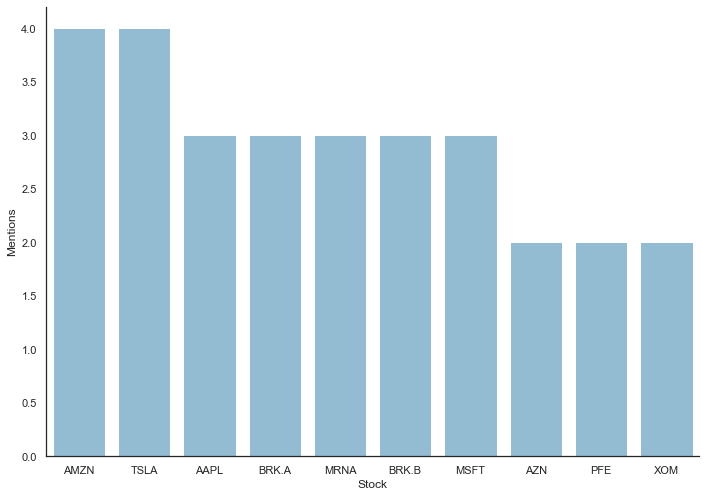

In [59]:
top10 = motley.groupby('stock_symbol')['company'].count().reset_index().sort_values(by = "company", ascending = False).head(10)
top10 = top10.rename(columns = {'company': 'mentions'})

sns.set_style("white")
ax = sns.barplot(x = "stock_symbol", y = "mentions", data = top10, color = sns.color_palette("Blues")[2])
ax.set_ylabel('Mentions')
ax.set_xlabel('Stock')

sns.despine()

This plot shows that Amazon and Tesla have been mentioned most frequently (four times each) in trending articles over the last few days. This is logical, as both are well-known, large-cap stocks that have experienced big price swings this week.

I also created a heat map to show how often stocks were mentioned on each day.

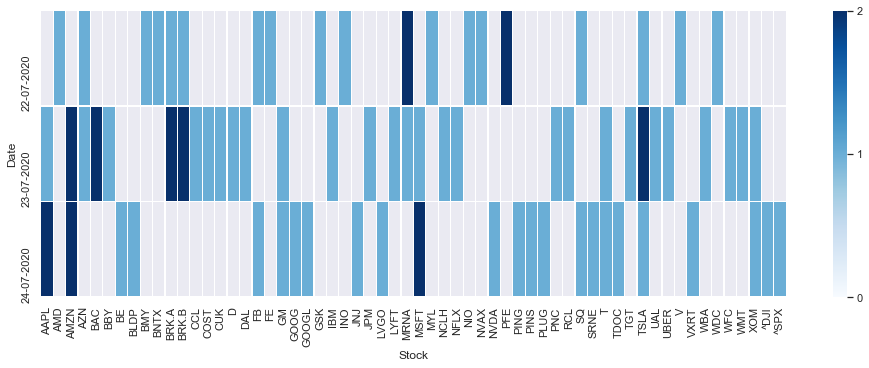

In [64]:
motley['date'] = pd.to_datetime(motley['article_date']).dt.strftime('%d-%m-%Y')
daily_mentions = motley.groupby(['date', 'stock_symbol'])['company'].count().reset_index()
daily_mentions = daily_mentions.rename(columns = {'company': 'mentions'})

sns.set(rc={'figure.figsize':(16.7,5.27)})

ax = sns.heatmap(daily_mentions.pivot(index = 'date', columns = 'stock_symbol', values = 'mentions'), 
            cmap = "Blues", vmin=0, vmax=daily_mentions['mentions'].max(), linewidths=0.2)

colorbar = ax.collections[0].colorbar
colorbar.set_ticks([0, 1, 2])
colorbar.set_ticklabels(['0', '1', '2'])

ax.set_ylabel('Date')
ax.set_xlabel('Stock')

plt.show()

Again, this doesn't show anything earth-shattering due to the limited size of the data, but it provides a good overview and makes it easy to see that large tech stocks like Apple, Amazon, Microsoft, and Tesla are mentioned most often.

#### Potential Future Improvements

Aside from simply gathering a larger dataset by scraping daily over a longer timeframe, there are several other future improvements that would make this code more useful.

One such improvement would be to scrape the text of each article and generate a sentiment score. While most articles are recommending stock buys ("5 Bank Stocks That Are Cheap Now"), some are informational ("Why Tesla Dropped 6% Today"), and others are negative recommendations ("3 Stocks to Avoid Under 5 Dollars"). A sentiment score could distinguish between positive, negative, and neutral articles to more accurately grade predictions.

#### Extra Credit

Since my analysis was relatively uninteresting due to the small dataset gathered, I chose to create an additional function taking a watchlist of stocks and returning the titles and links of any trending articles referencing stocks in the watchlist. While I only had my function return a string message, it would be fairly simple to add the ability to send an email or slack alert containing that information. This would be useful for someone who was only interested in certain stocks. If they automated this code to run every day, they could be notified of articles of interest and wouldn't need to spend time checking the homepage and potentially reading articles they didn't care about.

When I ran this method this morning using the watchlist `['AMZN', 'AAPL']`, I got the following output:

```
'Here are current Motley Fool trending articles mentioning stocks in your watchlist:\nGot $10,000? Here Are 4 Unstoppable Stocks to Buy Now: https://www.fool.com/investing/2020/07/24/got-10000-here-are-4-unstoppable-stocks-to-buy-now.aspx\nInvesting $1,500 in These 3 Top Stocks Would Be a Brilliant Move: https://www.fool.com/investing/2020/07/24/investing-1500-in-these-3-top-stocks-would-be-a-br.aspx\nThe 4 Biggest Dividend Payouts on Wall Street: https://www.fool.com/investing/2020/07/24/the-4-biggest-dividend-payouts-on-wall-street.aspx\nWhy Tesla Belongs in the Dow Jones Industrials: https://www.fool.com/investing/2020/07/24/why-tesla-belongs-in-the-dow-jones-industrials.aspx\n'
```